---
---

<center>

##### &nbsp;

# **IBM - Machine Learning Professional Certificate**


## **Supervised Machine Learning: Regression**


### **The Major Cities across the United States to Predict Rainfall**

### **JingZeng Xie**

</center>

<br/>
<br/>

---
---

# **TABLE OF CONTENTS**

<big>[**1. INTRODUCTION**](#1)</big>

- [**1.1 - Introduction**](#1.1)
- [**1.2 - Objective**](#1.2)
- [**1.3 - Coding Environment**](#1.3)

<big>[**2. DATA PROCESSING**](#2)

- [**2.1 - Data Collection**](#2.1)
- [**2.2 - Data Description**](#2.2)
- [**2.3 - Quality Assessment**](#2.3)
  - [2.3.1 - Normal Distribution](#2.3.1)
  - [2.3.2 - Missing Value](#2.3.2)
  - [2.3.3 - Invalid Value](#2.3.3)
  - [2.3.4 - Duplicate Value](#2.3.4)
  - [2.3.5 - Outlier Value](#2.3.5)
- [**2.4 - Data Preprocessing**](#2.4)
  - [2.4.1 - Data Cleaning](#2.4.1)
  - [2.4.2 - Missing Value Handling](#2.4.2)
  - [2.4.3 - Duplicate Handling](#2.4.3)
  - [2.4.4 - Outlier Handling](#2.4.4)
  - [2.4.5 - Centering and Scaling](#2.4.5)
  - [2.4.6 - Data Transformation](#2.4.6)
  - [2.4.7 - Correlation Coefficient](#2.4.7)
  - [2.4.8 - Data Encoding](#2.4.8)
- [**2.5 - Exploratory Data Analysis**](#2.5)
  - [2.5.1 - Data Visualization Analysis](#2.5.1)
  - [2.5.2 - Hypothesis Testing](2.5.2)

<big>[**3. MODELING**](#3)</big>

- [**3.1 - Data Splitting**](#3.1)
- [**3.2 - Evaluation Metric**](#3.2)
- [**3.3 - Linear Regression**](#3.3)
- [**3.4 - Polynomial Regression**](#3.4)
- [**3.5 - Logistic Regressiong**](#3.5)
- [**3.6 - Ridge Regression**](#3.6)
- [**3.7 - Lasso Regression**](#3.7)
- [**3.8 - Elastic Net Regression**](#3.8)

<big>[**4. SUMMARY**](#4)</big>

- [**4.1 - Models Evaluation**](#4.1)
- [**4.2 - Summary**](#4.2)

<big>[**5. REFERENCES**](#5)</big>


---
---

# **1. INTRODUCTION** <span id="1"></span>

---
---

## **1.1 - Introduction** <span id="1.1"></span>



This project focuses on analyzing detailed weather data from 20 major cities across the United States to predict rainfall. We will utilize various regression models commonly applied to predictive problems and, after evaluating and comparing these models, we aim to identify the one most suitable regression model for our objectives.

<br/>

A comprehensive exploration of the dataset will be conducted to assess its quality. To enhance the statistical significance and stability of our training model, we will employ a range of standard data processing techniques to clean and optimize the dataset. Once the data has been refined, we will perform visual analyses to further evaluate its statistical properties.

<br/>

Once the dataset is prepared for modeling, we will implement several regression techniques, including **Linear Regression**, **Polynomial Regression**, **Logistic Regression**, **Ridge Regression**, **Lasso Regression**, and **Elastic Net Regression**, to predict rainfall.

---

## **1.2 - Objective** <span id="1.2"></span>



- **Main Objective**: This analysis aims to determine whether rain occurs or not, specifying whether the models will focus on prediction or interpretation.

- **Dataset Overview**: The study utilizes a dataset comprising weather data from 20 major cities across the United States over the past 731 days, summarizing its key attributes and relevance.

- **Data Exploration and Preparation**: A brief summary of the data exploration process is provided, along with actions taken for data cleaning and feature engineering to enhance the dataset's quality and applicability.

- **Model Training and Comparison**: We summarize the training of various linear regression models models, exploring their differences in explainability and predictability. All models are compared using the same training and test splits, as well as a consistent cross-validation method.

- **Final Model Evaluation**: By employing this standardized approach, we identify the final regression models that best fit the dataset in terms of both accuracy and explainability.

- **Key Findings and Insights**: A summary of key findings and insights is presented, highlighting the main drivers of the final model and the valuable insights derived from the dataset through the classifier analysis.

---

## **1.3 - Coding Environment** <span id="1.3"></span>



The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.

In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, TimeSeriesSplit, KFold, StratifiedKFold, GroupKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

import scipy

---
---

# **2. DATA PROCESSING** <span id="2"></span>

---
---

## **2.1 - Data Collection** <span id="2.1"></span>




The dataset ([USA Rainfall Prediction Dataset (2024-2025)](https://www.kaggle.com/datasets/waqi786/usa-rainfall-prediction-dataset-2024-2025)) provides comprehensive weather data collected from 20 major cities across the USA during the years 2024 and 2025. It contains a variety of weather attributes that are crucial for predicting whether it will rain the next day or not. With over 2 years of daily data, this dataset serves as a perfect starting point for building predictive models, analyzing weather trends, or even developing weather-related applications.

<br/>

Each row represents a single day's weather conditions, including important features like temperature, humidity, wind speed, cloud cover, atmospheric pressure, and precipitation. The target feature, "Rain Tomorrow," is a binary label (1 = Yes, 0 = No) indicating whether it rained the next day.

<br/>

The dataset can be used for:
- Building rainfall prediction models
- Exploring weather patterns
- Studying the relationship between various weather factors
- Improving forecast accuracy using machine learning models


In [ ]:
# Loading the dataset from local drive
data = pd.read_csv("/content/usa_rain_prediction_dataset_2024_2025.csv")

print(data)

             Date         Location  Temperature   Humidity  Wind Speed  \
0      2024-01-01         New York    87.524795  75.655455   28.379506   
1      2024-01-02         New York    83.259325  28.712617   12.436433   
2      2024-01-03         New York    80.943050  64.740043   14.184831   
3      2024-01-04         New York    78.097552  59.738984   19.444029   
4      2024-01-05         New York    37.059963  34.766784    3.689661   
...           ...              ...          ...        ...         ...   
73095  2025-12-27  Washington D.C.    40.614393  65.099438   28.778327   
73096  2025-12-28  Washington D.C.    52.641643  30.610525   12.282890   
73097  2025-12-29  Washington D.C.    56.492591  96.740232    2.894762   
73098  2025-12-30  Washington D.C.    65.748956  63.900004   24.632400   
73099  2025-12-31  Washington D.C.    54.648609  80.812021   22.722505   

       Precipitation  Cloud Cover     Pressure  Rain Tomorrow  
0           0.000000    69.617966  1026.030278 

---

## **2.2 - Data Description** <span id="2.2"></span>

This project assumes that it is possible to predict rainfall in major cities of United States using various data related to weather.

<br/>

The **Feature** Variables:

| Features | Feature Type | Description | Data Type |
| :---: | :---: | --- | :--- |
| Date | Object | The date from January 1, 2024, to December 31, 2025 (Only has 731 days) | Object |
| Location | Object | The 20 major cities in the United States | Object |
| Temperature | Numeric | The average degree of hotness as measured on the day | Float |
| Humidity | Numeric | The average concentration of water vapor present in the air on the day | Float |
| Wind Speed | Numeric | The average speed of air is moving over a certain city on the day | Float |
| Precipitation | Numeric | The average condensation of atmospheric water vapor that falls from clouds | Float |
| Cloud Cover | Numeric | The amount of opaque clouds covering the sky valid for the day | Float |
| Pressure | Numeric | The force exerted against a surface by the weight of the air above that surface | Float |

<br/>

The **Target** Variables:

| Target | Feature Type | Description | Data Type |
| :---: | :---: | --- | :--- |
| Rain Tomorrow | Categorica | It rained on the next day (1 = Yes, 0 = No) | Integer |


In [ ]:
# Setting the categorical variables
data["Rain Tomorrow"] = data["Rain Tomorrow"].astype('category').cat.set_categories([0, 1], ordered=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           73100 non-null  object  
 1   Location       73100 non-null  object  
 2   Temperature    73100 non-null  float64 
 3   Humidity       73100 non-null  float64 
 4   Wind Speed     73100 non-null  float64 
 5   Precipitation  73100 non-null  float64 
 6   Cloud Cover    73100 non-null  float64 
 7   Pressure       73100 non-null  float64 
 8   Rain Tomorrow  73100 non-null  category
dtypes: category(1), float64(6), object(2)
memory usage: 4.5+ MB


In [ ]:
data_describe_object = data.describe(include='object')

data_describe_object.T

,count,unique,top,freq
Date,73100,731,2024-01-01,100
Location,73100,20,New York,3655


In [ ]:
data_describe_numeric = data.describe(include='number')

data_describe_numeric.T

,count,mean,std,min,25%,50%,75%,max
Temperature,73100.0,65.182270,20.205793,30.000766,47.678968,65.294949,82.636570,99.997393
Humidity,73100.0,59.875041,23.066115,20.000272,39.800732,59.887840,79.835990,99.999025
Wind Speed,73100.0,15.017946,8.668729,0.000712,7.485182,15.102495,22.551794,29.999017
Precipitation,73100.0,0.390635,0.474833,0.000000,0.000000,0.196909,0.673177,3.078090
Cloud Cover,73100.0,54.942807,25.982487,10.000856,32.318668,55.011121,77.412469,99.998957
Pressure,73100.0,1005.176013,20.203889,970.000919,987.697646,1005.284188,1022.727410,1039.999765


In [ ]:
data_describe_category = data.describe(include='category')

data_describe_category.T

,count,unique,top,freq
Rain Tomorrow,73100,2,0,56988


In [ ]:
data["Rain Tomorrow"].value_counts(normalize = True)

,proportion
Rain Tomorrow,
0,0.77959
1,0.22041


---

## **2.3 - Quality Assessment** <span id="2.3"></span>

---

### **2.3.1 - Normal Distribution** <span id="2.3.1"></span>

In Machine Learning, data satisfying **Normal Distribution** is beneficial for model building (**Especially regression based models**).

Models like **Linear Discriminant Analysis (LDA)**, **Gaussian Naive Bayes**, **Logistic Regression**, **Linear Regression**, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal.

In [ ]:
#-------------------------------------------------------------------------------
# The summary of skewness and kurtosis
#-------------------------------------------------------------------------------

# Get the data with type numeric
data_numeric = data.select_dtypes(include='number')
# Get the name of numeric column
data_numeric_column = list(data_numeric.columns)

# Get the skewness for numeric column
data_numeric_skew = data_numeric.skew()
# Get the kurtosis for numeric column
data_numeric_kurtosis = data_numeric.kurtosis()

data_normal_summary = pd.DataFrame( zip( data_numeric_column,
                        data_numeric_skew,
                        data_numeric_kurtosis ),
                     columns = [ "Column",
                             "Skewness",
                             "Kurtosis" ] )

data_normal_summary.sort_values(by="Skewness", ascending=False)

,Column,Skewness,Kurtosis
3,Precipitation,1.241112,1.018783
1,Humidity,0.003375,-1.200780
4,Cloud Cover,0.000772,-1.204550
2,Wind Speed,-0.007681,-1.205991
5,Pressure,-0.010555,-1.201018
0,Temperature,-0.014391,-1.198375


Based on the output above, we can conclude that most of the skewness in the numeric features is close to 0, indicating that the dataset is **approximately normally distributed**.

The kurtosis values are predominantly negative, suggesting that the dataset is **platykurtic**.

Overall, the dataset generally adheres to a normal distribution, with the **exception of the Precipitation featur**.

---

### **2.3.2 - Missing Value** <span id="2.3.2"></span>

**Missing Values** contain in most of the real world datasets, i.e., feature entries with no data value stored. As many machine learning algorithms do not support missing values, detecting the missing values and properly handling them, can have a significant impact.

In [ ]:
# Quick check of missing variables
data_missing = data.isnull()

data_missing.sum()

,0
Date,0
Location,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation,0
Cloud Cover,0
Pressure,0
Rain Tomorrow,0


Since there are no missing values in any of the columns, this indicates that the dataset is complete.

If there were missing values, the ratio of missing data in each column could be calculated using the appropriate code.

In [ ]:
#-------------------------------------------------------------------------------
# The summary of missing variables from whole columns
#-------------------------------------------------------------------------------

# Get the name of columns
data_column = list(data.columns)
# Get the total rows
data_row_count = np.array([len(data)] * len(data_column))

# Count of missing variables
data_missing_count = data_row_count - np.array(data.count())
# Missing variables / Total rows
data_missing_rate = np.divide( data_missing_count, data_row_count, out=np.zeros_like(data_missing_count, dtype=float), where=(data_row_count != 0) ) * 100

data_missing_summary = pd.DataFrame( zip( data_column,
                       data_row_count,
                       data_missing_count,
                       data_missing_rate ),
                    columns = [ "Column",
                            "Rows",
                            "Missing Values",
                            "Missing Rate %" ] )

data_missing_summary.sort_values(by="Missing Values", ascending=False)

,Column,Rows,Missing Values,Missing Rate %
0,Date,73100,0,0.0
1,Location,73100,0,0.0
2,Temperature,73100,0,0.0
3,Humidity,73100,0,0.0
4,Wind Speed,73100,0,0.0
5,Precipitation,73100,0,0.0
6,Cloud Cover,73100,0,0.0
7,Pressure,73100,0,0.0
8,Rain Tomorrow,73100,0,0.0


---

### **2.3.3 - Invalid Value** <span id="2.3.3"></span>

**Invalid Values** (Badly Formatted Values) refer to inconsistent entries commonly found in datasets, such as variables with different units across data points or incorrect data types. For instance, numerical variables like percentages and fractions are sometimes mistakenly stored as strings. It is essential to detect and correct these cases to ensure that machine learning algorithms can properly process and analyze the actual numerical values.

In [ ]:
data_describe_object.T

,count,unique,top,freq
Date,73100,731,2024-01-01,100
Location,73100,20,New York,3655


In [ ]:
data_describe_numeric.T

,count,mean,std,min,25%,50%,75%,max
Temperature,73100.0,65.182270,20.205793,30.000766,47.678968,65.294949,82.636570,99.997393
Humidity,73100.0,59.875041,23.066115,20.000272,39.800732,59.887840,79.835990,99.999025
Wind Speed,73100.0,15.017946,8.668729,0.000712,7.485182,15.102495,22.551794,29.999017
Precipitation,73100.0,0.390635,0.474833,0.000000,0.000000,0.196909,0.673177,3.078090
Cloud Cover,73100.0,54.942807,25.982487,10.000856,32.318668,55.011121,77.412469,99.998957
Pressure,73100.0,1005.176013,20.203889,970.000919,987.697646,1005.284188,1022.727410,1039.999765


In [ ]:
data_describe_category.T

,count,unique,top,freq
Rain Tomorrow,73100,2,0,56988


Currently, the data types align with those described in the data documentation, and there are no invalid data types present in the dataset.

---

### **2.3.4 - Duplicate Value** <span id="2.3.4"></span>

**Duplicate Values** can appear in various forms, such as multiple entries of the same data point, repeated instances of entire columns, or duplication within an ID variable. While duplicates may be valid in some datasets, they often result from errors during data extraction or integration. Therefore, it is crucial to detect these duplicate values and determine whether they represent true duplicates or are a legitimate part of the dataset.

In [ ]:
# Quick check of duplicate row
data.duplicated().sum()

0

In [ ]:
# Quick check of unique value
data_unique_count = data.nunique()

data_unique_count

,0
Date,731
Location,20
Temperature,73100
Humidity,73100
Wind Speed,73100
Precipitation,44754
Cloud Cover,73100
Pressure,73100
Rain Tomorrow,2


In [ ]:
#-------------------------------------------------------------------------------
# The summary of duplicate variables from whole columns
#-------------------------------------------------------------------------------

# Unique variables / Total rows
data_duplicate_rate = ( np.ones(len(data_unique_count)) - np.divide( list(data_unique_count), data_row_count, out=np.zeros_like(data_unique_count, dtype=float), where=(data_row_count != 0) ) ) * 100

data_duplicate_summary = pd.DataFrame( zip ( data_column,
                         data_row_count,
                         data_unique_count,
                         data_duplicate_rate),
                     columns = [ "Column",
                             "Rows",
                             "Unique Values",
                             "Duplicate Rate %" ] )

data_duplicate_summary.sort_values(by="Duplicate Rate %", ascending=False)

,Column,Rows,Unique Values,Duplicate Rate %
8,Rain Tomorrow,73100,2,99.997264
1,Location,73100,20,99.972640
0,Date,73100,731,99.000000
5,Precipitation,73100,44754,38.777018
2,Temperature,73100,73100,0.000000
3,Humidity,73100,73100,0.000000
4,Wind Speed,73100,73100,0.000000
6,Cloud Cover,73100,73100,0.000000
7,Pressure,73100,73100,0.000000


Upon reviewing the object-type features and the target feature, we found that they align with the ranges specified in the data description.

In examining the numeric features, we note that all features, except for the Precipitation feature, have a duplicate rate of 0%. This indicates that there are no duplicate values in the dataset, while the Precipitation feature contains some duplicates.

---

### **2.3.5 - Outlier Value** <span id="2.3.5"></span>

**Outliers** (Anomalies) are data points that differ substantially from the rest of data, and they may arise due to the diversity of the dataset or because of errors/mistakes. As machine learning algorithms are sensitive to the range and distribution of attribute values, identifying the outliers and their nature is important for assessing the quality of the dataset.

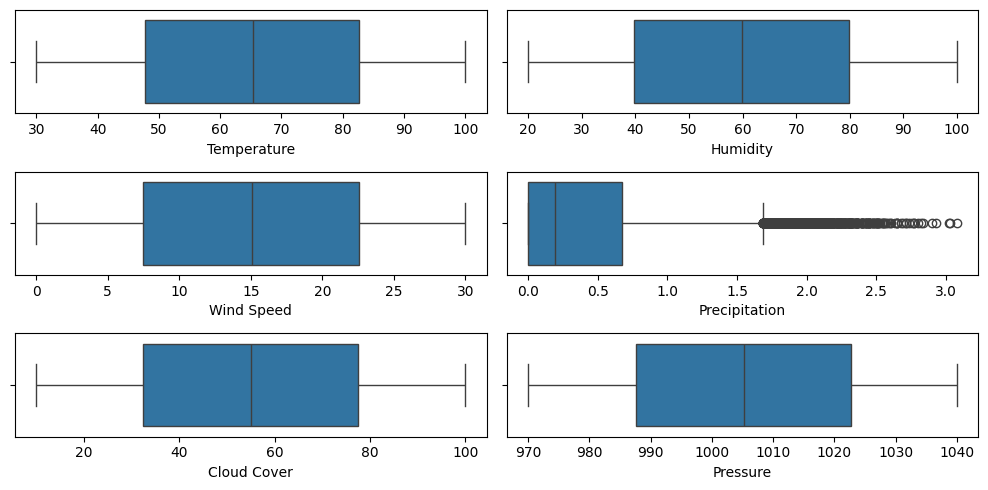

In [ ]:
#-------------------------------------------------------------------------------
# The boxplots of outlier
#-------------------------------------------------------------------------------

# Setting the size of subplots
_, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))
ax = ax.ravel()

# Display the boxplot
for index, column in enumerate(data_numeric.columns):
  sns.boxplot(data=data, ax=ax[index], x=column)

# Do not blocked any title or label
plt.tight_layout()
plt.show()

In [ ]:
#-------------------------------------------------------------------------------
# The summary of outlier variables from numeric columns
#-------------------------------------------------------------------------------

# Using IQR method to detect outlier variables
data_describe_numeric_q1 = data_describe_numeric.T["25%"] #data_numeric.quantile(0.25)
data_describe_numeric_q3 = data_describe_numeric.T["75%"] #data_numeric.quantile(0.75)
data_describe_numeric_iqr = data_describe_numeric_q3 - data_describe_numeric_q1

# Min and Max boundary to detect outlier
data_describe_numeric_min_iqr = data_describe_numeric_q1 - 1.5 * data_describe_numeric_iqr
data_describe_numeric_max_iqr = data_describe_numeric_q3 + 1.5 * data_describe_numeric_iqr

# Count the outliers
data_outlier_count = ( (data_numeric < data_describe_numeric_min_iqr) | (data_numeric > data_describe_numeric_max_iqr) ).sum()

# Get the total rows
data_row_numeric_count = list( [ len(data_numeric) ] * len(data_numeric.columns) )

# outlier variables / Total rows of numeric column
data_outlier_rate = np.divide( list(data_outlier_count), data_row_numeric_count, out=np.zeros_like(data_outlier_count, dtype=float), where=(data_row_numeric_count != 0) ) * 100

data_outlier_summary = pd.DataFrame( zip( data_numeric_column,
                       data_row_numeric_count,
                       data_outlier_count,
                       data_outlier_rate ),
                    columns = [ "Column",
                            "Rows",
                            "Outlier Values",
                            "Outlier Rate %" ] )

data_outlier_summary.sort_values(by="Outlier Values", ascending=False)

,Column,Rows,Outlier Values,Outlier Rate %
3,Precipitation,73100,1192,1.630643
0,Temperature,73100,0,0.000000
1,Humidity,73100,0,0.000000
2,Wind Speed,73100,0,0.000000
4,Cloud Cover,73100,0,0.000000
5,Pressure,73100,0,0.000000


The plots above indicate the presence of outliers in the Precipitation feature.

---

## **2.4 - Data Processing** <span id="2.4"></span>

---

### **2.4.1 - Data Cleaning** <span id="2.4.1"></span>

**Data Cleaning** is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct.

In [**2.3 - Quality Assessment**](#2.3), we examined the dataset and confirmed that there were no missing values or incorrect data formats. However, we identified outliers that need to be addressed.

The Date feature in the dataset is not critical for our analysis. Specifically, we aim to predict whether it will rain tomorrow, and data from the same date in the previous year is not strongly correlated.

While the Date feature could be transformed into a seasonal classification, given that weather patterns often vary with the seasons (for example, spring typically experiences greater likelihood of rain), but we prefer to keep the dataset and model uncomplicated.

Therefore, we propose discarding the Date feature to simplify the model training process.

In [ ]:
# Discard the unimportant features
data.drop(columns=["Date"], inplace=True)

data_describe_numeric = data.describe(include='number')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Location       73100 non-null  object  
 1   Temperature    73100 non-null  float64 
 2   Humidity       73100 non-null  float64 
 3   Wind Speed     73100 non-null  float64 
 4   Precipitation  73100 non-null  float64 
 5   Cloud Cover    73100 non-null  float64 
 6   Pressure       73100 non-null  float64 
 7   Rain Tomorrow  73100 non-null  category
dtypes: category(1), float64(6), object(1)
memory usage: 4.0+ MB


---

### **2.4.2 - Missing Value Handling** <span id="2.4.2"></span>

**Missing Value Handling** usually uses some techniques:

1. **Median or Mean**

  - No matter use median or mean as imputation value, it has limitations. For example, imputing with the mean may not be appropriate if the data has extreme values, as it can be heavily influenced by outliers
  - Similarly, imputing with the median may not be appropriate if the data is multimodal, as it may not represent the true central tendency of the data

2. **Iterative**

  - An advanced imputation method that models each feature with missing values as a function of other features in a round-robin fashion. It uses a regression model to estimate missing values based on the observed values of other features. The imputation process is performed iteratively, with each iteration refining the imputed values until convergence or a specified maximum number of iterations is reached
  - Commonly used regression models: **Linear Regression**, **Bayesian Ridge** (regularized linear regression), **Decision Trees Regressor**, **Random Forest Regressor**, and **K-Neighbors Regressor**, etc.
  - **K-Neighbors Regressor** is different from KNN imputation, which learns from samples with missing values by using a distance metric that accounts for missing values, rather than imputing them

3. **K-Nearest Neighbors (KNN)**
  
  - KNN Imputer imputes missing values based on the nearest neighbors, which means it preserves the underlying relationships in the data. It takes into account the feature similarities between data points to estimate the missing values, making it more contextually relevant
  - **Non-Parametric** method, which means it does not make assumptions about the data's distribution. It is suitable for both numeric and categorical data, making it versatile in handling various types of missing values

4. **Multiple Imputation by Chained Equations (MICE)**

  - The procedure imputes missing data in a dataset through an iterative series of predictive models. In each iteration, each specified variable in the dataset is imputed using the other variables in the dataset. These iterations should be run until it appears that convergence has been met

In [**2.3.2 - Missing Value**](#2.3.2), we examined the dataset and confirmed that there are no missing values.

**Method - Median or Mean**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Median or Mean
#-------------------------------------------------------------------------------
'''
# Median
data_missing_imputation = data_describe_numeric.T["50%"].T
# Average/Mean
data_missing_imputation = data_describe_numeric.T["mean"].T

data.fillna(value = data_missing_imputation)
'''

**Method - Iterative**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Iterative
#-------------------------------------------------------------------------------
'''
# Linear Regression
data_missing_iterative_estimator = LinearRegression()
# Bayesian Ridge
data_missing_iterative_estimator = BayesianRidge()
# Decision Trees Regressor
data_missing_iterative_estimator = DecisionTreeRegressor()
# Random Forest Regressor
data_missing_iterative_estimator = RandomForestRegressor()
# K-Neighbors Regressor
data_missing_iterative_estimator = KNeighborsRegressor()

# Initialization iterative imputation object
data_missing_iterative_imputation = IterativeImputer(estimator = data_missing_iterative_estimator, imputation_order = 'ascending')

# Replace the result in the original dataset
data[data_numeric.columns] = pd.DataFrame(data_missing_iterative_imputation.fit_transform(data_numeric), columns = data_numeric.columns)
'''

**Method - K-Nearest Neighbors (KNN)**

In [ ]:
#-------------------------------------------------------------------------------
# Method - K-Nearest Neighbors (KNN)
#-------------------------------------------------------------------------------
'''
# Initialization KNN imputation object
data_missing_knn_imputation = KNNImputer()

# Replace the result in the original dataset
data[data_numeric.columns] = pd.DataFrame(data_missing_knn_imputation.fit_transform(data_numeric), columns = data_numeric.columns)
'''

**Summary after Missing Values Handling**

In [ ]:
#-------------------------------------------------------------------------------
# The summary of missing variables from whole columns
#-------------------------------------------------------------------------------
'''
# Get the name of columns
data_column = list(data.columns)
# Get the total rows
data_row_count = np.array([len(data)] * len(data_column))
# Count of missing variables
data_missing_count = data_row_count - np.array(data.count())
# Missing variables / Total rows
data_missing_rate = np.divide( data_missing_count, data_row_count, out=np.zeros_like(data_missing_count, dtype=float), where=(data_row_count != 0) ) * 100

data_missing_summary = pd.DataFrame( zip( data_column,
                       data_row_count,
                       data_missing_count,
                       data_missing_rate ),
                    columns = [ "Column",
                            "Rows",
                            "Missing Values",
                            "Missing Rate %" ] )

data_missing_summary.sort_values(by="Missing Values", ascending=False)
'''

---

### **2.4.3 - Duplicate Handling** <span id="2.4.3"></span>

In [**2.3.4 - Duplicate Value**](#2.3.4), we examined the dataset and confirmed that there are no values with a high duplication rate that require addressing.

In [ ]:
# Drop the duplicate rows
'''
data.drop_duplicates(inplace=True)
'''

**Summary after Duplicate Handling**

In [ ]:
#-------------------------------------------------------------------------------
# The summary of duplicate variables from whole columns
#-------------------------------------------------------------------------------
'''
# Quick check of unique value
data_unique_count = data.nunique()

# Unique variables / Total rows
data_duplicate_rate = ( np.ones(len(data_unique_count)) - np.divide( list(data_unique_count), data_row_count, out=np.zeros_like(data_unique_count, dtype=float), where=(data_row_count != 0) ) ) * 100

data_duplicate_summary = pd.DataFrame( zip ( data_column,
                         data_row_count,
                         data_unique_count,
                         data_duplicate_rate),
                     columns = [ "Column",
                             "Rows",
                             "Unique Values",
                             "Duplicate Rate %" ] )

data_duplicate_summary.sort_values(by="Duplicate Rate %", ascending=False)
'''

---

### **2.4.4 - Outlier Handling** <span id="2.4.4"></span>

**Outlier Handling** usually uses four different techniques:

1. **Deleting Observations**

  - We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers
  - **BUT** deleting the observation is not a good idea when we have small dataset

2. **Transforming Values**

  - Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values
  - If dataset has to many extreme values or skewed, **Log Transformation**, **Cube Root Normalization**, **Box-transformation**, **Yeo-Johnson Power Transformation**, etc., those techniques convert values in the dataset to smaller values
  - **BUT** these technique not always give the best results. For example, **Log Transformation** requires that each transformed value not closing to zero; **Box-transformation** requires that each transformed value is positive, otherwise **Yeo-Johnson Power Transformation** needs to be used as an alternative

3. **Imputation**
  
  - Like imputation of missing values, we can also impute outliers. We can use **Mean**, **Median**, **Zero** value in this methods. Since we imputing there is no loss of data
  - Use missing value imputation methods, such as **Iterative Imputation** and **K-Nearest Neighbors (KNN) Imputation**

4. **Separately Treating**

  - If there are significant number of outliers and dataset is small , we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output
  - **BUT** this technique is tedious when the dataset is large

In [**2.3.5 - Outlier Value**](#2.3.5), we examined the dataset and identified 1,192 outlier values in the Precipitation feature. Out of a total of 73,100 observations, these outliers represent approximately 1.63% of the dataset (1,192 out of 73,100). Therefore, we will use the simplest outlier handling method: deleting the affected observations.

In [ ]:
# Using IQR method to detect outlier variables except Year
data_describe_numeric_q1 = data_describe_numeric.T["25%"] #data_numeric.quantile(0.25)
data_describe_numeric_q3 = data_describe_numeric.T["75%"] #data_numeric.quantile(0.75)
data_describe_numeric_iqr = data_describe_numeric_q3 - data_describe_numeric_q1

# Min and Max boundary to detect outlier
data_describe_numeric_min_iqr = data_describe_numeric_q1 - 1.5 * data_describe_numeric_iqr
data_describe_numeric_max_iqr = data_describe_numeric_q3 + 1.5 * data_describe_numeric_iqr

# Count the outliers
data_outlier_count = ( (data_numeric < data_describe_numeric_min_iqr) | (data_numeric > data_describe_numeric_max_iqr) ).sum()

**Method - Deleting Bbservations**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Deleting observations
#-------------------------------------------------------------------------------

data.drop( data[ (data["Precipitation"] < data_describe_numeric_min_iqr["Precipitation"]) | (data["Precipitation"] > data_describe_numeric_max_iqr["Precipitation"]) ].index, inplace=True )

data.reset_index(drop=True, inplace=True)

**Method - Transforming Values**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Transforming values - Log Transformation
#-------------------------------------------------------------------------------
'''
# If data value closing to 0, DO NOT use this method
data["Precipitation"] = np.log(data["Precipitation"])
'''

In [ ]:
#-------------------------------------------------------------------------------
# Method - Transforming values - Cube Root Normalization
#-------------------------------------------------------------------------------
'''
data["Precipitation"] = (data["Precipitation"]**(1/3))
'''

In [ ]:
#-------------------------------------------------------------------------------
# Method - Transforming values - Box-Transformation or Yeo-Johnson Power Transformation
#-------------------------------------------------------------------------------
'''
# Boxcox requires all of the elements must be positive, otherwise use Yeo-Johnson Power Transformation
if np.any(data["Precipitation"] <= 0):
  data["Precipitation"], _ = scipy.stats.yeojohnson(data["Precipitation"], lmbda=None)
else:
  data["Precipitation"], _ = scipy.stats.boxcox(data["Precipitation"], lmbda=None)
'''

**Method - Imputation**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Imputation - Median, Mean, Zero
#-------------------------------------------------------------------------------
'''
# Median
data_precipitation_outlier_imputation = data_describe_numeric["Precipitation"]["50%"] # data["Precipitation"].midian()
# Average/Mean
data_precipitation_outlier_imputation = data_describe_numeric["Precipitation"]["mean"] # data["Precipitation"].mean()
# Zero
data_precipitation_outlier_imputation = 0

data["Precipitation"] = np.where( (data["Precipitation"] < data_describe_numeric_min_iqr["Precipitation"]) | (data["Precipitation"] > data_describe_numeric_max_iqr["Precipitation"]), data_precipitation_outlier_imputation, data["Precipitation"] )
'''

**Visualize the Boxplot after Outlier Handling**

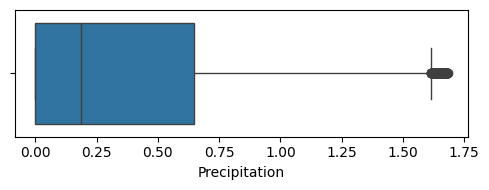

In [ ]:
#-------------------------------------------------------------------------------
# The boxplots
#-------------------------------------------------------------------------------

# Setting the size of subplots
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 2))

# Display the boxplot
for index, column in enumerate(data_outlier_count.loc[data_outlier_count > 0].index):
  sns.boxplot(data=data, ax=ax, x=column)

# Do not blocked any title or label
plt.tight_layout()
plt.show()

---

### **2.4.5 - Centering and Scaling** <span id="2.4.5"></span>

**Centering and Scaling** ensures that the criterion for finding linear combinations of the predictors is based on how much variation they explain and therefore improves the numerical stability.

- **Standard Scaling** - Converts features to **standard normal** variables, and it centers and scales a variable to mean 0 and standard deviation 1
- **Min-Max Scaling** - Convert variables to continuous variables in the \[0, 1\] interval by mapping minimum values to 0 and maximum values to 1
- **Robust Scaling** - Similar to min-max scaling, but instead maps the **interquartile range** (Q3 - Q1) to \[0, 1\] interval, it means the variable itself takes values outside of the \[0, 1\] interval

In [ ]:
# Get the data with type numeric that AFTER cleaning and outlier handling
data_numeric = data.select_dtypes(include='number')

**Method - Standard Scaling**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Standard Scaling
#-------------------------------------------------------------------------------
'''
data[data_numeric.columns] = StandardScaler().fit_transform(data_numeric)
'''

**Method - Min-Max Scaling**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Min-Max Scaling
#-------------------------------------------------------------------------------

data[data_numeric.columns] = MinMaxScaler().fit_transform(data_numeric)

**Method - Robust Scaling**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Robust Scaling
#-------------------------------------------------------------------------------
'''
data[data_numeric.columns] = RobustScaler().fit_transform(data_numeric)
'''

**Visualize the Boxplot after Centering and Scaling**

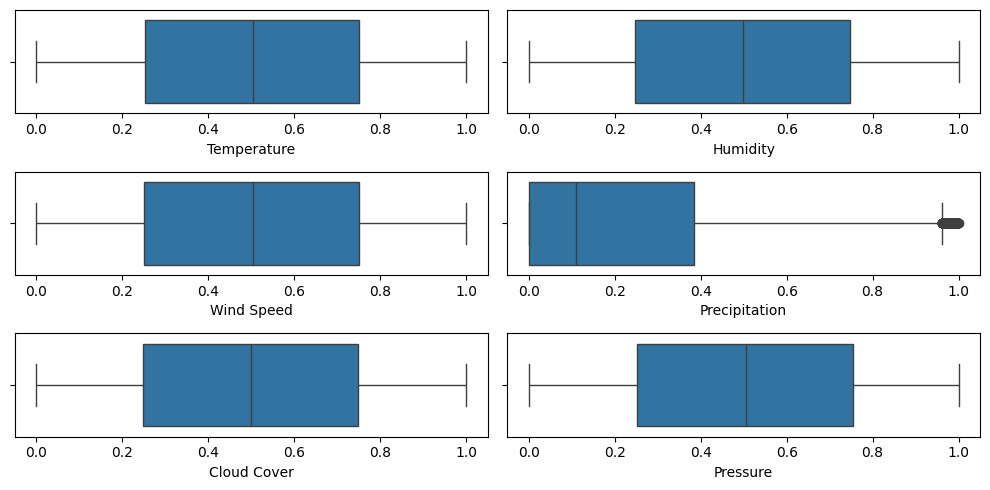

In [ ]:
#-------------------------------------------------------------------------------
# The boxplots
#-------------------------------------------------------------------------------

# Setting the size of subplots
_, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))
ax = ax.ravel()

# Display the boxplot
for index, column in enumerate(data_numeric.columns):
  sns.boxplot(data=data, ax=ax[index], x=column)

# Do not blocked any title or label
plt.tight_layout()
plt.show()

---

### **2.4.6 - Data Transformation** <span id="2.4.6"></span>

Features and predicted data are often **Skewed** (distorted away from the center), it degrades the model's ability to describe typical cases as it has to deal with rare cases on extreme values (**especially regression based models**).

**Data Transformation** usually can solve the skewed data. To ensure that the machine learning model capabilities is not affected, skewed data has to be transformed to approximate to a normal distribution. The method used to transform the skewed data depends on the characteristics of the data.

- Popular data transformation techniques include **Log Transformation**, **Cube Root Normalization**, **Box-Transformation**, **Yeo-Johnson Power Transformation**, etc.

- **BUT** these technique not always give the best results. For example, **Log Transformation** requires that each transformed value not closing to zero; **Box-Transformation** requires that each transformed value is positive, otherwise **Yeo-Johnson Power Transformation** needs to be used as an alternative


**It is worth noting that tree-based models are not affected by these issues**, as they can effectively ignore correlation concerns. Consequently, tree-based models do not require data transformation, centering, or scaling.

In [**2.3.1 - Normal Distribution**](#2.3.1), we verified that the skewness of all numerical features aligns with a normal distribution, except for the Precipitation feature, which exhibits skewness.

Even after addressing outliers in [**2.4.4 - Outlier Handling**](#2.4.4) and applying centering and scaling in [**2.4.5 - Centering and Scaling**](#2.4.5), the boxplot still shows that the Precipitation feature remains skewed.

**Method - Log Transformation**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Log Transformation
#-------------------------------------------------------------------------------
'''
# If data value closing to 0, DO NOT use this method
data["Precipitation"] = np.log(data["Precipitation"])
'''

**Method - Cube Root Transformation**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Cube Root Normalization
#-------------------------------------------------------------------------------
'''
data["Precipitation"] = (data["Precipitation"]**(1/3))
'''

**Method - Box-Transformation or Yeo-Johnson Power Transformation**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Box-Transformation or Yeo-Johnson Power Transformation
#-------------------------------------------------------------------------------

# Boxcox requires all of the elements must be positive, otherwise use Yeo-Johnson Power Transformation
if np.any(data["Precipitation"] <= 0):
  data["Precipitation"], _ = scipy.stats.yeojohnson(data["Precipitation"], lmbda=None)
else:
  data["Precipitation"], _ = scipy.stats.boxcox(data["Precipitation"], lmbda=None)

**Summary after Transformation**

In [ ]:
#-------------------------------------------------------------------------------
# The summary of skewness and kurtosis
#-------------------------------------------------------------------------------

# Get the data with type numeric
data_numeric = data.select_dtypes(include='number')

# Get the skewness for numeric column
data_numeric_skew = data_numeric.skew()
# Get the kurtosis for numeric column
data_numeric_kurtosis = data_numeric.kurtosis()

data_normal_summary = pd.DataFrame( zip( data_numeric_column,
                        data_numeric_skew,
                        data_numeric_kurtosis ),
                     columns = [ "Column",
                             "Skewness",
                             "Kurtosis" ] )

data_normal_summary.sort_values(by="Skewness", ascending=False)

,Column,Skewness,Kurtosis
3,Precipitation,0.310341,-1.509251
1,Humidity,0.004682,-1.199930
4,Cloud Cover,0.001629,-1.204348
2,Wind Speed,-0.008524,-1.206635
5,Pressure,-0.010839,-1.201128
0,Temperature,-0.014004,-1.197688


---

### **2.4.7 - Correlation Coefficient** <span id="2.4.7"></span>

Understanding the correlations between variables in a model is essential for several reasons:

1. **Feature selection**

  - Process of choosing which variables or features to use in the model. Highly correlated features provide redundant information, so feature selection aims to remove uninformative features to simplify models

  - By analyzing correlations, we can identify redundant features and select a minimal set of important features that best represent the target variable. This prevents overfitting and improves a model's ability to generalize

2. **Reduce Bias**

  - Correlation analysis is also important for ensuring model fairness and avoiding bias. When certain features are highly correlated with sensitive attributes like gender or ethnicity, it can inadvertently encode biases into machine learning models if not properly addressed

  - If a model relies too heavily on these correlated features, it risks discriminating against or disadvantaging certain groups. By identifying correlations between input features and sensitive attributes, we can evaluate models for potential biases, monitor feature importance, and apply techniques like fair representation learning to mitigate bias

3. **Multicollinearity**

  - Another important aspect of analyzing feature correlations is detecting multicollinearity. Multicollinearity occurs when two or more predictor variables in a model are highly linearly correlated with each other. It can negatively impact models by increasing variance and making it difficult to determine the significance and effect of individual predictors

  - Variables with high multicollinearity provide redundant information, similar to how correlated features do. However, multicollinearity is more problematic because it inflates standard errors and undermines reliability of estimated coefficients. By examining correlation matrices and variance inflation factors, we can identify cases of multicollinearity between input features

4. **Interpretability and Debugging**

  - Understanding correlations also aids in interpreting machine learning models. As models become increasingly complex with many interacting variables, it can be difficult to explain why a model makes certain predictions

  - By analyzing the correlation between input features and output targets, we gain insights into which variables have the strongest impact on the model's decisions. Knowing feature correlations further assists in debugging models that perform poorly. It allows we to identify any features that may be overwhelming the model or causing unintended biases

**Interpreting a Correlation Coefficient**

- The value of the correlation coefficient always ranges between 1 and -1, and we treat it as a general indicator of the strength of the relationship between variables

- The sign of the coefficient reflects whether the variables change in the same or opposite directions: a positive value means the variables change together in the same direction, while a negative value means they change together in opposite directions

- The absolute value of a correlation coefficient tells the magnitude of the correlation: the greater the absolute value, the stronger the correlation

| Correlation Coefficient	 | Strength of Linearity / Monotonically | Correlation Type |
| :---: | :---: | :---: |
| -0.75 to -1 | Perfectly | Negative |
| -0.5 to -0.75 | Strong | Negative |
| -0.25 to -0.5 | Moderate | Negative |
| 0 to -0.25 | Weak | Negative |
| 0 | None | Zero |
| 0 to 0.25 | Weak | Positive |
| 0.25 to 0.5 | Moderate | Positive |
| 0.5 to 0.75 | Strong | Positive |
| 0.75 to 1 | Perfectly | Positive |

<br/>

**Methods of Calculate the Correlation Coefficient**

Usually we use two mainstream methods to calculate the correlation coefficient:

1. **Pearson's Correlation Coefficient**

  - The Pearson's correlation coefficient describes the linear relationship between two quantitative variables

  - The assumptions for use Pearson's correlation coefficient:

    1. Expect a linear relationship between the two variables
    2. Both variables are on an interval or ratio level of measurement
    3. Data from both variables follow normal distributions
    4. Data have no outliers

  - **BUT** it's not a good measure of correlation if variables have a nonlinear relationship, or if data have outliers, skewed distributions, or come from categorical variables

2. **Spearman's Rank-Order Correlation**

  - Spearman's rank correlation coefficient is the most common alternative to Pearson method. It uses the rankings of data from each variable (e.g., from lowest to highest) rather than the raw data itself

  - Use Spearman method when data fail to meet the assumptions of Pearson method. This happens when at least one of variables is on an ordinal level of measurement or when the data from one or both variables do not follow normal distributions

  - Spearman's correlation coefficient measures the monotonicity of relationships, and monotonic relationships are less restrictive than linear relationships

    - Positive monotonic: when one variable increases, the other also increases

    - Negative monotonic: when one variable increases, the other decreases

In [**2.3.1 - Normal Distribution**](#2.3.1), [**2.4.1 - Cleaning**](#2.4.1) and [**2.4.2 - Outlier Handling**](#2.4.2), we confirmed that all assumptions for Pearson's correlation coefficient are met. Therefore, we will use Pearson's correlation coefficient for our analysis.

**Method - Pearson's Correlation Coefficient**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Pearson's Correlation Coefficient
#-------------------------------------------------------------------------------

# Computing the Pearson's correlation coefficient, BUT corr() won't have P-value
#data_numeric_correlation = data_numeric.corr(method='pearson')'''

# Computing the Pearson's correlation coefficient and P-value
data_numeric_correlation = np.ones(shape=(data_numeric.shape[1], data_numeric.shape[1]))
data_numeric_correlation_p = np.zeros(shape=(data_numeric.shape[1], data_numeric.shape[1]))
for index_1, column_1 in enumerate(data_numeric.columns):
  for index_2, column_2 in enumerate(data_numeric.columns):
    if index_1 != index_2:
      data_numeric_correlation[index_1, index_2], data_numeric_correlation_p[index_1, index_2] = scipy.stats.pearsonr(data_numeric[column_1], data_numeric[column_2])

**Method - Spearman's Correlation Coefficient**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Spearman's Rank-Order Correlation
#-------------------------------------------------------------------------------
'''
# Computing the Spearman's correlation coefficient, BUT corr() won't have P-value
#data_numeric_correlation = data_numeric.corr(method='spearman')

# Computing the Spearman's correlation coefficient and P-value
data_numeric_correlation = np.ones(shape=(data_numeric.shape[1], data_numeric.shape[1]))
data_numeric_correlation_p = np.zeros(shape=(data_numeric.shape[1], data_numeric.shape[1]))
for index_1, column_1 in enumerate(data_numeric.columns):
  for index_2, column_2 in enumerate(data_numeric.columns):
    if index_1 != index_2:
      data_numeric_correlation[index_1, index_2], data_numeric_correlation_p[index_1, index_2] = scipy.stats.spearmanr(data_numeric[column_1], data_numeric[column_2])
'''

**Visualize the Heatmap of Correlation Coefficient**

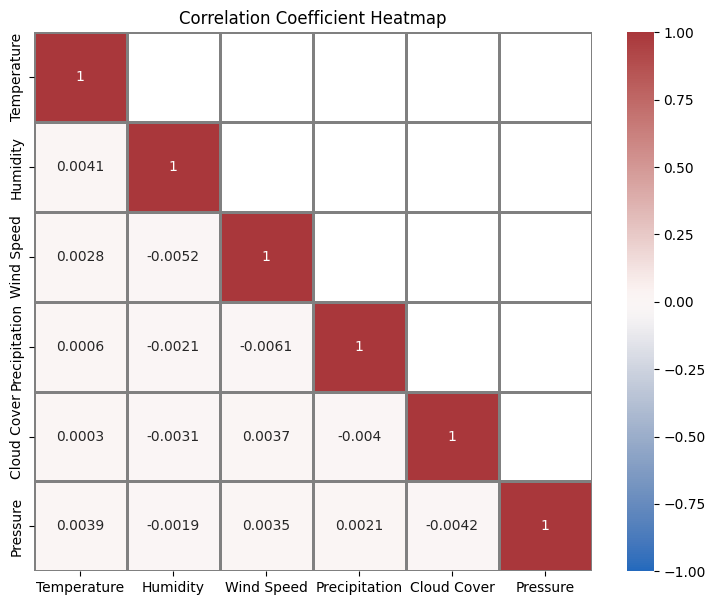

In [ ]:
# Display the heatmap of correlation coefficient
_, ax = plt.subplots(figsize=(9, 7))
sns.heatmap( data_numeric_correlation,
       ax = ax,
       mask = np.triu(data_numeric_correlation, 1),
       xticklabels = data_numeric.columns,
       yticklabels = data_numeric.columns,
       annot = True,
       center = 0,
       vmin = -1,
       vmax = 1,
       cmap = 'vlag',
       linecolor = 'gray',
       linewidths = 1 )

plt.title("Correlation Coefficient Heatmap")
plt.show()

**Visualize the Heatmap of Correlation Coefficient P-Value**

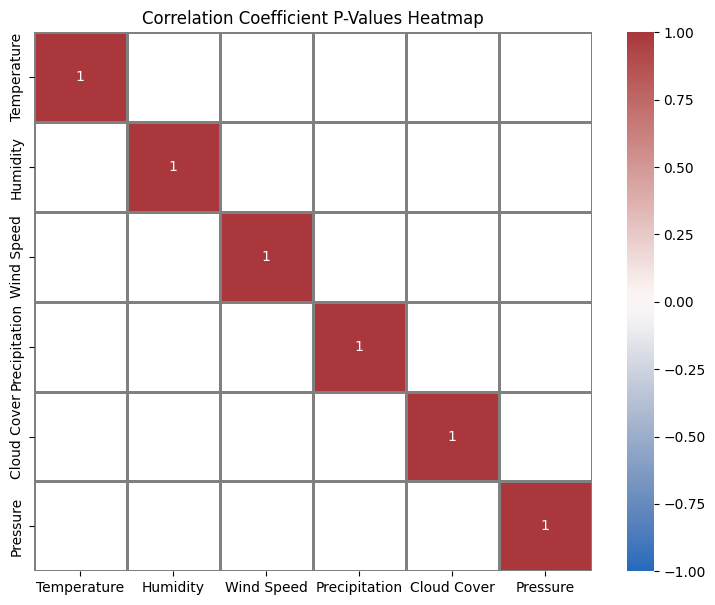

In [ ]:
# Display the heatmap of correlation coefficient after P-values hypothesis test
_, ax = plt.subplots(figsize=(9, 7))
sns.heatmap( data_numeric_correlation,
       ax = ax,
       mask = np.invert(np.tril(data_numeric_correlation_p < 0.05)),
       xticklabels = data_numeric.columns,
       yticklabels = data_numeric.columns,
       annot = True,
       center = 0,
       vmin = -1,
       vmax = 1,
       cmap = 'vlag',
       linecolor = 'gray',
       linewidths = 1 )

plt.title('Correlation Coefficient P-Values Heatmap')
plt.show()

From the two plots above, we observed that all numerical features exhibit no correlation with one another.

---

### **2.4.8 - Data Encoding** <span id="2.4.8"></span>

**Data Encoding** refers to the process of converting categorical or textual data into numerical format, so that it can be used as input for algorithms to process. The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables.

There are two types of categorical data:

- **Nominal Data** - The categories of data do not have an inherent order. This means that the categories cannot be ranked or ordered. For example: Occupational titles for doctor, lawyer, instructor, athlete, etc.

- **Ordinal Data** - The categories of data have an inherent order. This means that the categories can be ranked or ordered from highest to lowest or vice versa. For example: Grades start with A+, A, A-, B+, B, B-, etc.

**Methods of Data Encoding**

The choice of encoding method can have a significant impact on model performance, so it is important to choose an appropriate encoding technique based on the nature of the data and the specific requirements of the model.

1. **One-Hot Encoding**
  - Binary column is created for each unique category in the variable. If a category is present in a sample, the corresponding column is set to 1, and all other columns are set to 0
  - In the case of one-hot encoding, for N categories in a variable, it uses N binary variables
  - For example, if a variable has three categories A, B and C, they can be represented as \[1, 0, 0\], \[0, 1, 0\] and \[0, 0, 1\], respectively

2. **Dummy Encoding**
  - Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables 0/1
  - The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N categories
  - For example, if a variable has three categories A, B and C, they can be represented as \[1, 0\] and \[0, 1\], respectively

3. **Binary Encoding**
  - Similar to one-hot encoding, but instead of creating a separate column for each category, the categories are represented as binary digits
  - For example, if a variable has four categories A, B, C and D, they can be represented as 0001, 0010, 0100 and 1000, respectively

4. **Label Encoding**
  - Each unique category is assigned a Unique Integer value
  - But the assigned integers may be misinterpreted by the machine learning algorithm as having an ordered relationship when in fact they do not.
  - For example, if a variable has four categories A, B, C and D, they can be represented as 0, 1, 2 and 3, respectively

4. **Ordinal Encoding**
  - Ordinal encoding is used when the categories in a variable have an inherent ordering
  - The categories are assigned a numerical value based on their order, such as 1, 2, 3, etc.
  - For example, if a variable has categories Low, Medium and High, they can be assigned the values 1, 2, and 3, respectively

In sections [**2.2 - Data Description**](#2.2) and [**2.4.1 - Data Cleaning**](#2.4.1), we identified two features: a textual feature, Location, and a date feature, Date. Since the Date feature does not exhibit a strong relationship with predicting whether it will rain tomorrow, we have decided to discard it. The remaining Location feature consists of the names of major cities in the United States. The goal of this project is to predict rainfall based on the provided weather features. As the Location feature will not be used in the training process, there is no need to encode it.

**Method - One-Hot Encoding**

In [ ]:
#-------------------------------------------------------------------------------
# Method - One-Hot Encoding
#-------------------------------------------------------------------------------
'''
data_encoding_object = pd.DataFrame(data["Location"], columns=["Location"])
data_encoding_object = pd.get_dummies(data_encoding_object["Location"], columns=["Location"])

# Drop the old features
data.drop(columns=["Location"], inplace=True)
# Combination to the original data
data = pd.concat( [data, data_encoding_object], axis=1 )
'''

**Method - Dummy Encoding**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Dummy Encoding
#-------------------------------------------------------------------------------
'''
data_encoding_object = pd.DataFrame(data["Location"], columns=["Location"])
data_encoding_object = pd.get_dummies(data_encoding_object["Location"], drop_first=True, columns=["Location"])

# Drop the old features
data.drop(columns=["Location"], inplace=True)
# Combination to the original data
data = pd.concat( [data, data_encoding_object], axis=1 )
'''

**Method - Binary Encoding**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Binary Encoding
#-------------------------------------------------------------------------------
'''
data_encoding_object_rank = { city : index for index, city in enumerate(data["Location"].unique()) }

data["Location"] = data["Location"].map(data_encoding_object_rank).apply(lambda x: format(x, 'b'))
'''

**Method - Label Encoding**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Label Encoding
#-------------------------------------------------------------------------------
'''
data_encoding_object_rank = { city : index for index, city in enumerate(data["Location"].unique()) }

data["Location"] = data["Location"].map(data_encoding_object_rank)
'''

**Method - Ordinal Encoding**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Ordinal Encoding
#-------------------------------------------------------------------------------
'''
EXAMPLE
# Identity the order of the categories
data_encoding_object_rank = { "low=": 0,
                 "medium": 1,
                 "high": 2 }

data["Location"] = data["Location"].map(data_encoding_object_rank)
'''

**Summary after Data Encoding**

In [ ]:
# Summary the data after encoding
'''
display(data)
data.info()
'''

---

## **2.5 - Exploratory Data Analysis** <span id="2.5"></span>

---

### **2.5.1 - Data Visualization Analysis** <span id="2.5.1"></span>

**Data Visualization** is an important component of Exploratory Data Analysis (EDA), because it helps us to understand the variables and relationships between them. These variables could be dependent or independent to each other.

| **Univariate Analysis** | **Bivariate Analysis** | **Multivariate Analysis** |
| :---: | :---: | :---: |
| It only summarize single variable at a time | It only summarize two variables | It only summarize more than 2 variables |
| It does not deal with causes and relationships | It does deal with causes and relationships and analysis is done | It does not deal with causes and relationships and analysis is done |
| The main purpose is to describe | The main purpose is to explain | The main purpose is to study the relationship among them |

For this section, we focus on the bivariate analysis to analyzing the relationship between the two variables are positive and negative, or show no clear pattern.

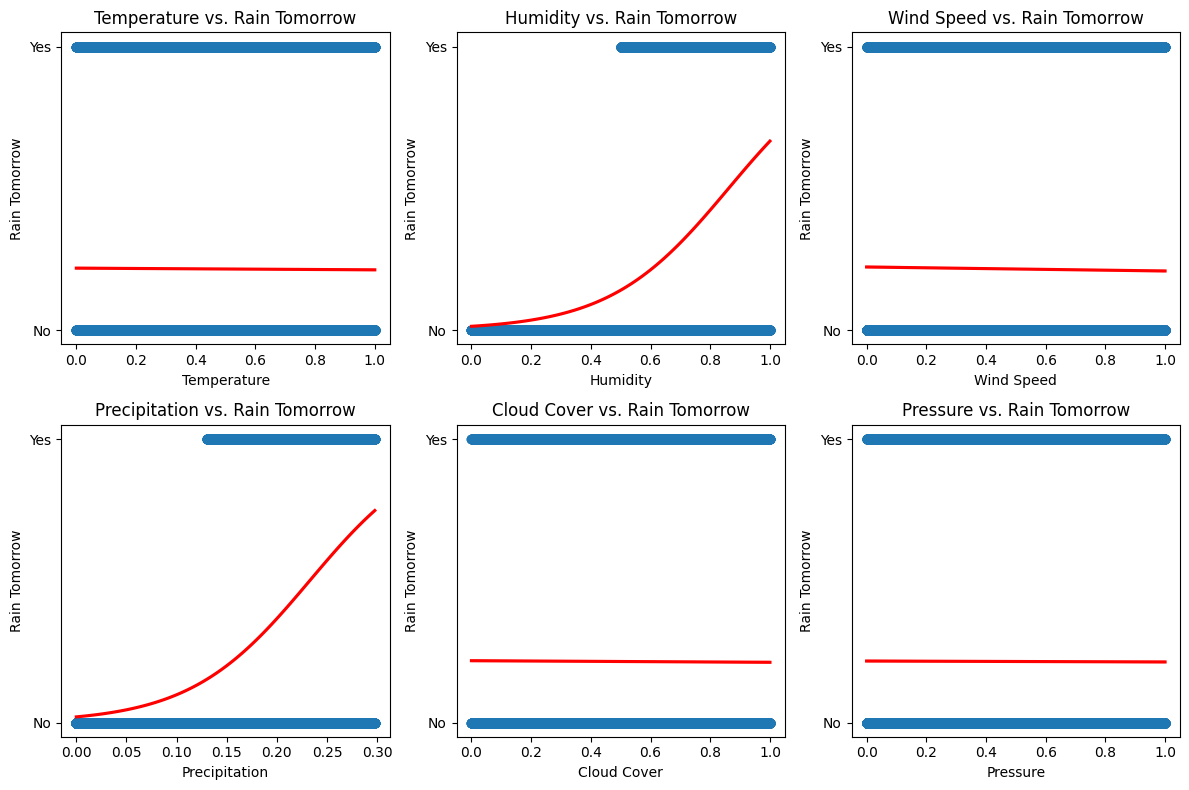

In [ ]:
#-------------------------------------------------------------------------------
# The scatter plots conclude linear fitting line
#-------------------------------------------------------------------------------

# Initialization the subplots
_, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
ax = ax.ravel()

# Draw the scatter plots conclude linear fitting line
for index, column in enumerate(data_numeric.columns):
  sns.regplot(data, ax=ax[index], x=column, y="Rain Tomorrow", line_kws={"color": "red"}, logistic=True)
  ax[index].set_xlabel(column)
  ax[index].set_ylabel("Rain Tomorrow")
  ax[index].set_yticks([0, 1], ["No", "Yes"])
  ax[index].set_title(column + " vs. Rain Tomorrow")

# Do not blocked any title or label
plt.tight_layout()
plt.show()

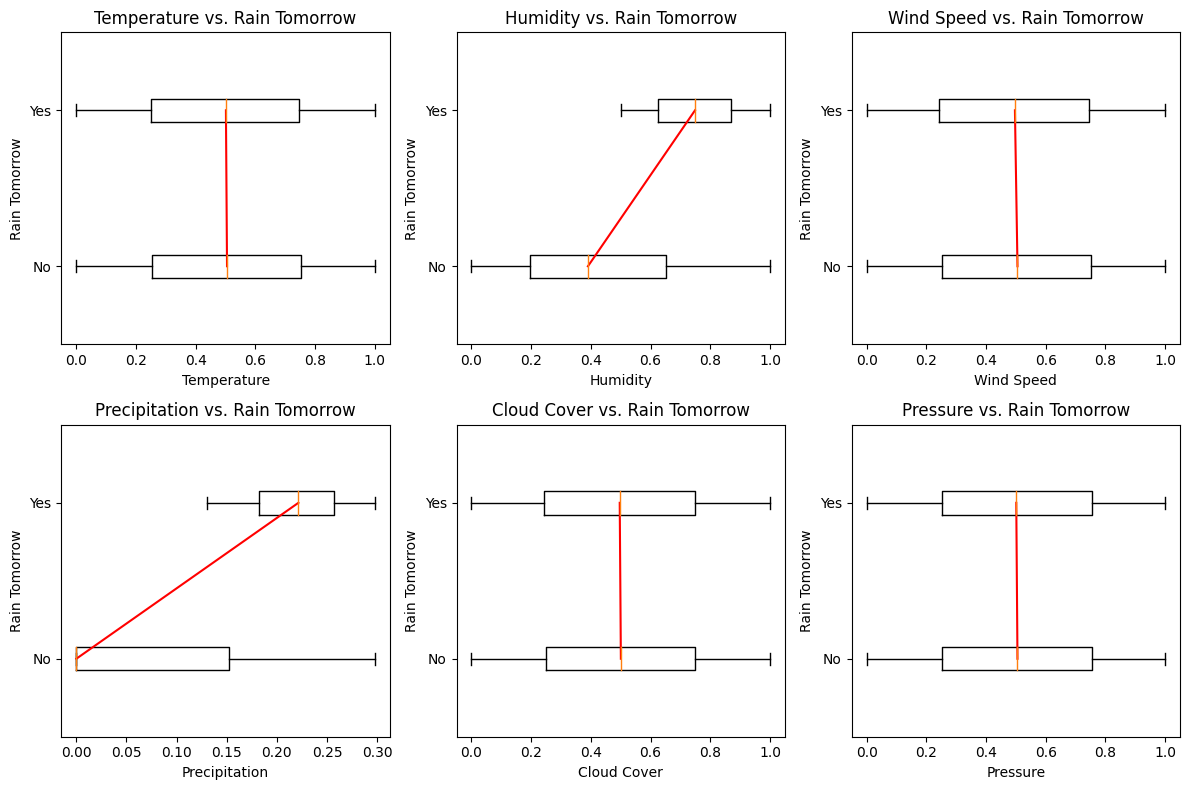

In [ ]:
#-------------------------------------------------------------------------------
# The boxplots conclude linear fitting line
#-------------------------------------------------------------------------------

# Initialization the subplots
_, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
ax = ax.ravel()

# Get the description by split by target, which is same as pandas.describe() but split by target.
data_target_vs_feature = data.groupby("Rain Tomorrow")

# Draw the boxplots
for index, column in enumerate(data_numeric.columns):

  boxplot_data_x_median, boxplot_data_y_median, boxplot_data = [], [], []
  for order, target in data_target_vs_feature:
    boxplot_data_x_median.append(target[column].describe()["50%"])
    boxplot_data_y_median.append(order + 1)
    boxplot_data.append(target[column])

  ax[index].boxplot( boxplot_data, vert=False )
  ax[index].set_xlabel(column)
  ax[index].set_ylabel("Rain Tomorrow")
  ax[index].set_yticks(boxplot_data_y_median, ["No", "Yes"])
  ax[index].set_title(column + " vs. Rain Tomorrow")

  # linear fitting line
  slope, intercept = np.polyfit(boxplot_data_x_median, boxplot_data_y_median, 1)
  ax[index].plot(boxplot_data_x_median, slope * np.array(boxplot_data_x_median) + intercept, color='red')

# Do not blocked any title or label
plt.tight_layout()
plt.show()

From the above plots we have the following analysis.

- Increasing values for the following features are associated with the **Rain Tomorrow - Yes** outcome:

  1. Humidity
  2. Precipitation

- Decreasing values for the following features are associated with the **Rain Tomorrow - No** outcome:
  - None

- The values for the following features are not associated with the **Rain Torrmow - Yes or No** outcome:

  1. Temperature
  2. Wind Speed
  3. Cloud Cover
  4. Pressure

---

### **2.5.2 - Hypothesis Testing** <span id="2.5.2"></span>

In terms of a P-value and a chosen significance level (alpha):
- If P-value <= alpha (usually 5%): significant result, reject null hypothesis (H0), dependent
- If P-value > alpha (usually 5%): not significant result, fail to reject null hypothesis (H0), independent

**Hypothesis Testing**

We seek to explore whether the occurrence of rain or the absence of rain leads to different weather features values over the past 731 days across 20 major cities in the United States.

To evaluate this, we formulated the following hypotheses:

- **Null (H0)**: The mean values of weather features are consistent, regardless of whether it is a rainy day or not.
- **Alternative (H1)**: The mean values of weather features differ based on the occurrence of rain.

In [ ]:
# Get the data with type numeric
data_numeric = data.select_dtypes(include='number')

In [ ]:
# Split into two group by Rain Tomorrow 0 or 1
group_0 = data_numeric[data["Rain Tomorrow"] == 0]
group_1 = data_numeric[data["Rain Tomorrow"] == 1]

# Calculate the T-test value and P-value by Welch"s t-test
data_t_test = {}
for column in data_numeric.columns:
  data_t_test[column] = scipy.stats.ttest_ind(group_0[column], group_1[column], equal_var=True)

# Create a summary table
data_t_test_summary = data_numeric.from_dict(data_t_test, orient="index", columns=["Statistic", "P-Value"])

data_t_test_summary.sort_values(by=["P-Value"], ascending=True)

,Statistic,P-Value
Humidity,-137.020240,0.000000
Precipitation,-176.905844,0.000000
Wind Speed,2.639905,0.008295
Temperature,1.115482,0.264648
Cloud Cover,1.069446,0.284872
Pressure,0.613900,0.539283


The P-values for the following features are less than 0.05 (5%):

1. Humidity
2. Precipitation
3. Wind Speed

We reject the null hypothesis of the T-test and conclude that there is sufficient evidence to suggest that the occurrence of rain leads to significant changes in these features.

Conversely, the P-values for the following features are greater than 0.05 (5%):

1. Temperature
2. Cloud Cover
3. Pressure

We do not reject the null hypothesis of the T-test and conclude that there is insufficient evidence to assert that the occurrence of rain affects their values.

---
---

# **3. MODELING** <span id="3"></span>

---
---

---

### **3.1 - Data Splitting** <span id="3.1"></span>

**Data Splitting** is a crucial process in machine learning, involving the partitioning of a dataset into different subsets, such as training, validation, and test sets. This is essential for training models, tuning parameters, and ultimately assessing their performance.

- **Training Set** - Used to train the machine learning model, this is the core dataset where the model learns to understand patterns and relationships in the data

- **Validation Set** - Assists in fine-tuning the model. It evaluates the model's performance during the training phase, helping adjust hyperparameters and prevent overfitting

- **Test Set** - Provides a fair evaluation of the model's performance on unseen data. This is crucial for assessing the model's ability to generalize to unknown data

The following are several commonly used methods of data splitting:

1. **Random Splitting** - Randomly divides the dataset

2. **Stratified Splitting** - When dealing with imbalanced datasets, Stratified splitting ensures consistency in class distribution

3. **Time Series Splitting** - Rreservation of chronological order during data partitioning, since the order of data points is crucial, as observations typically depend on previous results

4. **K-Fold Cross-Validation** - Divides the dataset into K equally sized folds, allowing for multiple rounds of training and validation
  - **Standard K-Fold Cross-Validation**: In traditional K-Fold cross-validation, the data set undergoes random partitioning into K folds of roughly equal size. In each iteration, one fold is the validation set, while the remaining K - 1 folds constitute the training set. We repeat this procedure K times, ensuring that each fold is used exactly once as the validation set.
  - **Stratified K-Fold Cross-Validation**: Stratified K-Fold cross-validation aims to maintain a consistent distribution of classes in each fold, aligning with the overall proportion observed in the data set.
  - **Group K-Fold Cross-Validation**: Group K-Fold cross-validation is employed when working with data sets where samples exhibit interdependencies, such as time-series data or data with spatial correlations. This method guarantees that samples from the same group are either entirely within the training or validation set, preventing data leakage across folds.


We use 75% of the data for the train set and the remaining 25% for the test set.

In [ ]:
# Splitting the data in to X and Y, relanvet to predictor data and target data
data_X = data_numeric
data_Y = data["Rain Tomorrow"]

data_X_train, data_X_test, data_Y_train, data_Y_test = {}, {}, {}, {}

**Mothod - Random Splitting**

In [ ]:
#-------------------------------------------------------------------------------
# Mothod - Random Splitting
#-------------------------------------------------------------------------------
'''
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split(data_X, data_Y, test_size=0.25, shuffle=True)
'''

**Mothod - Stratified Splitting**

In [ ]:
#-------------------------------------------------------------------------------
# Mothod - Stratified Splitting
#-------------------------------------------------------------------------------
'''
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split(data_X, data_Y, test_size=0.25, shuffle=True, stratify=data_Y)
'''
# OR

for data_train_index, data_test_index in StratifiedShuffleSplit(n_splits=1, test_size=0.25).split(data_X, data_Y):
  data_X_train, data_X_test, data_Y_train, data_Y_test = data_X.iloc[data_train_index], data_X.iloc[data_test_index], data_Y.iloc[data_train_index], data_Y.iloc[data_test_index]

**Mothod - Time Series Splitting**

In [ ]:
#-------------------------------------------------------------------------------
# Mothod - Time Series Splitting
#-------------------------------------------------------------------------------
'''
# We don't have DATE object, cause we alreayd discard it in 2.4.1 - Data Cleaning section.
for data_train_index, data_test_index in TimeSeriesSplit(n_splits=1, test_size=0.25, gap=0).split(data_X):
  data_X_train, data_X_test, data_Y_train, data_Y_test = data_X.iloc[data_train_index], data_X.iloc[data_test_index], data_Y.iloc[data_train_index], data_Y.iloc[data_test_index]
'''

**Mothod - K-Fold Cross-Validation**

In [ ]:
#-------------------------------------------------------------------------------
# Mothod - K-Fold Cross-Validation - Standard
#-------------------------------------------------------------------------------
'''
kf = KFold(n_splits=4, shuffle=True)
kf.get_n_splits(data_X)

data_kfold_index = []
for index, (data_train_index, data_test_index) in enumerate(kf.split(data_X)):
  data_kfold_index.append(index)
  data_X_train[index], data_X_test[index], data_Y_train[index], data_Y_test[index] = data_X.iloc[data_train_index], data_X.iloc[data_test_index], data_Y.iloc[data_train_index], data_Y.iloc[data_test_index]
'''

In [ ]:
#-------------------------------------------------------------------------------
# Mothod - K-Fold Cross-Validation - Stratified
#-------------------------------------------------------------------------------
'''
skf = StratifiedKFold(n_splits=4, shuffle=True)
skf.get_n_splits(data_X, data_Y)

data_kfold_index = []
for index, (data_train_index, data_test_index) in enumerate(skf.split(data_X, data_Y)):
  data_kfold_index.append(index)
  data_X_train[index], data_X_test[index], data_Y_train[index], data_Y_test[index] = data_X.iloc[data_train_index], data_X.iloc[data_test_index], data_Y.iloc[data_train_index], data_Y.iloc[data_test_index]
'''

In [ ]:
#-------------------------------------------------------------------------------
# Mothod - K-Fold Cross-Validation - Group
#-------------------------------------------------------------------------------
'''
# Setting the group variable
group = np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10])

# We don't have any feature that are dependent correlations, cause we alreayd discard it in 2.4.7 - Correlation Coefficient section.
gkf = GroupKFold(n_splits=4, shuffle=True)
gkf.get_n_splits(data_X, data_Y, group)

data_kfold_index = []
for index, (data_train_index, data_test_index) in enumerate(gkf.split(data_X, data_Y, group)):
  data_kfold_index.append(index)
  data_X_train[index], data_X_test[index], data_Y_train[index], data_Y_test[index] = data_X.iloc[data_train_index], data_X.iloc[data_test_index], data_Y.iloc[data_train_index], data_Y.iloc[data_test_index]
'''

---

### **3.2 - Evaluation Metric** <span id="3.2"></span>

The following metrics are widely used in machine learning to evaluate regression model performance:

* **R-Squared**
  - A number that tells you how well the independent variables in a model explains the variation in the dependent variable.
  - It ranges from 0 to 1, where 1 indicates a perfect fit of the model to the data

* **Mean Squared Error (MSE)**
  - Measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values
  - As model error increases, its value increases and when a model has no error, the MSE equals zero

* **Mean Absolute Error (MAE)**
  - A metric for assessing the accuracy of regression models by calculating the average absolute difference between predicted and actual values
  - Does not square the errors, treating all deviations equally, regardless of direction. When a model perfect fit, the MAE equals zero

In [ ]:
# Setup the function to evaluate the regression model performance
def evaluation_regression_model(acutal, predict):
  scores = pd.DataFrame( zip( [ "R-Squared",
                    "Mean Squared Error",
                    "Mean Absolute Error" ],
                  [ r2_score(acutal, predict),
                    mean_squared_error(acutal, predict),
                    mean_absolute_error(acutal, predict) ] ),
                columns = [ "Metric",
                        "Value" ] )
  return scores

regression_model_scores = { "Train" : {}, "Test" : {} }

---

### **3.3 - Linear Regression** <span id="3.3"></span>

**Hyperparameter**:
- **None**

In [ ]:
#-------------------------------------------------------------------------------
# Linear Regression - Initialization
#-------------------------------------------------------------------------------

model = LinearRegression()
model.fit(data_X_train, data_Y_train)

**Prediction and Evaluation on Training Set**

In [ ]:
#-------------------------------------------------------------------------------
# Linear Regression - Train Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_train)

regression_model_scores["Train"]["Linear"] = evaluation_regression_model(data_Y_train, np.round(y_hat))

regression_model_scores["Train"]["Linear"]

,Metric,Value
0,R-Squared,0.621919
1,Mean Squared Error,0.063878
2,Mean Absolute Error,0.063878


**Prediction and Evaluation on Test Set**

In [ ]:
#-------------------------------------------------------------------------------
# Linear Regression - Test Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_test)

regression_model_scores["Test"]["Linear"] = evaluation_regression_model(data_Y_test, np.round(y_hat))

regression_model_scores["Test"]["Linear"]

,Metric,Value
0,R-Squared,0.630612
1,Mean Squared Error,0.062413
2,Mean Absolute Error,0.062413


---

### **3.4 - Polynomial Regression** <span id="3.4"></span>

**Hyperparameter**:
- **Degree**: The degree of the polynomial determines the highest power to which the features are raised, and higher degrees can lead to overfitting

In [ ]:
#-------------------------------------------------------------------------------
# Polynomial Regression - Initialization
#-------------------------------------------------------------------------------

pf = PolynomialFeatures(degree=2, include_bias=False)

data_X_train_poly = pf.fit_transform(data_X_train)
data_X_test_poly = pf.transform(data_X_test)

model = LinearRegression()
model.fit(data_X_train_poly, data_Y_train)

**Prediction and Evaluation on Training Set**

In [ ]:
#-------------------------------------------------------------------------------
# Polynomial Regression - Train Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_train_poly)

regression_model_scores["Train"]["Polynomial"] = evaluation_regression_model(data_Y_train, np.round(y_hat))

regression_model_scores["Train"]["Polynomial"]

,Metric,Value
0,R-Squared,0.783577
1,Mean Squared Error,0.036565
2,Mean Absolute Error,0.036565


**Prediction and Evaluation on Test Set**

In [ ]:
#-------------------------------------------------------------------------------
# Polynomial Regression - Test Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_test_poly)

regression_model_scores["Test"]["Polynomial"] = evaluation_regression_model(data_Y_test, np.round(y_hat))

regression_model_scores["Test"]["Polynomial"]

,Metric,Value
0,R-Squared,0.788310
1,Mean Squared Error,0.035768
2,Mean Absolute Error,0.035768


---

### **3.5 - Logistic Regression** <span id="3.5"></span>

**Hyperparameter**:
- **None**

In [ ]:
#-------------------------------------------------------------------------------
# Logistic Regression - Initialization
#-------------------------------------------------------------------------------

model = LogisticRegression()
model.fit(data_X_train, data_Y_train)

**Prediction and Evaluation on Training Set**

In [ ]:
#-------------------------------------------------------------------------------
# Logistic Regression - Train Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_train)

regression_model_scores["Train"]["Logistic"] = evaluation_regression_model(data_Y_train, y_hat)

regression_model_scores["Train"]["Logistic"]

,Metric,Value
0,R-Squared,0.638161
1,Mean Squared Error,0.061134
2,Mean Absolute Error,0.061134


**Prediction and Evaluation on Test Set**

In [ ]:
#-------------------------------------------------------------------------------
# Logistic Regression - Test Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_test)

regression_model_scores["Test"]["Logistic"] = evaluation_regression_model(data_Y_test, y_hat)

regression_model_scores["Test"]["Logistic"]

,Metric,Value
0,R-Squared,0.645756
1,Mean Squared Error,0.059854
2,Mean Absolute Error,0.059854


---

### **3.6 - Ridge Regression** <span id="3.6"></span>

**Hyperparameter**:
- **Alpha**: A larger value indicates a more aggressive penalization and lead to more regularization, reducing the model's complexity

In [ ]:
#-------------------------------------------------------------------------------
# Ridge Regression - Initialization
#-------------------------------------------------------------------------------

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

model = RidgeCV(alphas=alphas, cv=4)
model.fit(data_X_train, data_Y_train)

**Prediction and Evaluation on Training Set**

In [ ]:
#-------------------------------------------------------------------------------
# Ridge Regression - Train Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_train)

regression_model_scores["Train"]["Ridge"] = evaluation_regression_model(data_Y_train, np.round(y_hat))

regression_model_scores["Train"]["Ridge"]

,Metric,Value
0,R-Squared,0.621919
1,Mean Squared Error,0.063878
2,Mean Absolute Error,0.063878


**Prediction and Evaluation on Test Set**

In [ ]:
#-------------------------------------------------------------------------------
# Ridge Regression - Test Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_test)

regression_model_scores["Test"]["Ridge"] = evaluation_regression_model(data_Y_test, np.round(y_hat))

regression_model_scores["Test"]["Ridge"]

,Metric,Value
0,R-Squared,0.630612
1,Mean Squared Error,0.062413
2,Mean Absolute Error,0.062413


---

### **3.7 - Lasso Regression** <span id="3.7"></span>

**Hyperparameter**:
- **Alpha**: A larger value indicates a more aggressive penalization and lead to more regularization, reducing the model's complexity

In [ ]:
#-------------------------------------------------------------------------------
# Lasso Regression - Initialization
#-------------------------------------------------------------------------------

alphas = np.array([1e-5, 5e-5, 0.0001, 0.0005])

model = LassoCV(alphas=alphas, max_iter=int(5e4), cv=4)
model.fit(data_X_train, data_Y_train)

**Prediction and Evaluation on Training Set**

In [ ]:
#-------------------------------------------------------------------------------
# Lasso Regression - Train Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_train)

regression_model_scores["Train"]["Lasso"] = evaluation_regression_model(data_Y_train, np.round(y_hat))

regression_model_scores["Train"]["Lasso"]

,Metric,Value
0,R-Squared,0.622028
1,Mean Squared Error,0.063859
2,Mean Absolute Error,0.063859


**Prediction and Evaluation on Test Set**

In [ ]:
#-------------------------------------------------------------------------------
# Lasso Regression - Test Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_test)

regression_model_scores["Test"]["Lasso"] = evaluation_regression_model(data_Y_test, np.round(y_hat))

regression_model_scores["Test"]["Lasso"]

,Metric,Value
0,R-Squared,0.630283
1,Mean Squared Error,0.062469
2,Mean Absolute Error,0.062469


---

### **3.8 - Elastic Net Regression** <span id="3.8"></span>

**Hyperparameter**:
- **Alpha**: A larger value indicates a more aggressive penalization and lead to more regularization, reducing the model's complexity
- **L1 Ratio**: The ratio ranges from 0 to 1, reflecting a scale between L1 and L2 penalties. Values near 0 emphasize L2 penalties, while values near 1 favor L1 penalties

In [ ]:
#-------------------------------------------------------------------------------
# Elastic Net Regression - Initialization
#-------------------------------------------------------------------------------

alphas = np.array([1e-5, 5e-5, 0.0001, 0.0005])
l1_ratios = np.linspace(0.1, 0.9, 9)

model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, max_iter=int(1e4))
model.fit(data_X_train, data_Y_train)

**Prediction and Evaluation on Training Set**

In [ ]:
#-------------------------------------------------------------------------------
# Elastic Net  Regression - Train Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_train)

regression_model_scores["Train"]["ElasticNet"] = evaluation_regression_model(data_Y_train, np.round(y_hat))

regression_model_scores["Train"]["ElasticNet"]

,Metric,Value
0,R-Squared,0.621699
1,Mean Squared Error,0.063915
2,Mean Absolute Error,0.063915


**Prediction and Evaluation on Test Set**

In [ ]:
#-------------------------------------------------------------------------------
# Elastic Net  Regression - Test Set Prediction
#-------------------------------------------------------------------------------

y_hat = model.predict(data_X_test)

regression_model_scores["Test"]["ElasticNet"] = evaluation_regression_model(data_Y_test, np.round(y_hat))

regression_model_scores["Test"]["ElasticNet"]

,Metric,Value
0,R-Squared,0.630941
1,Mean Squared Error,0.062357
2,Mean Absolute Error,0.062357


---
---

# **4. SUMMARY** <span id="4"></span>

---
---

---

### **4.1 - Models Evaluation** <span id="4.1"></span>

We will now compare the prediction results of various regression models on both the training and test sets. The most suitable model for this project will be selected based on metrics such as R-Squared, Mean Squared Error, and Mean Absolute Error.

In [ ]:
# Split the metric values of train set and test set
model_scores_train = pd.concat( regression_model_scores["Train"] )
model_scores_test = pd.concat( regression_model_scores["Test"] )

**Model Evaluation Based on the R-Squared Metric**

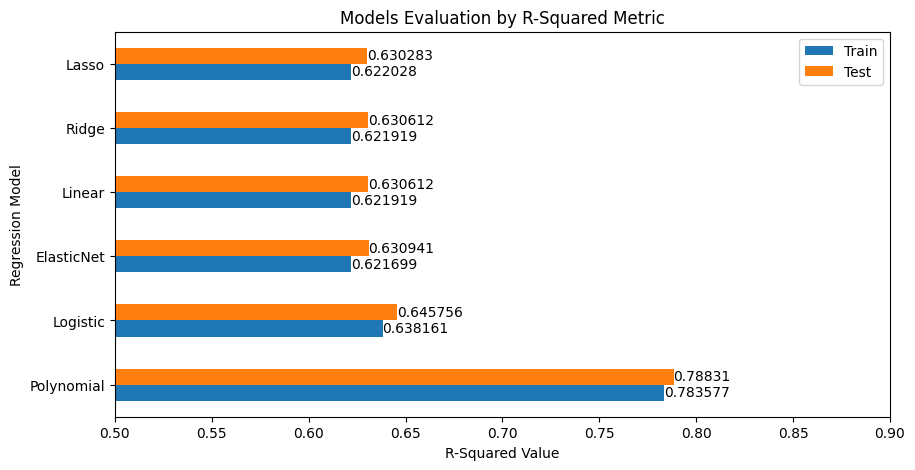

In [ ]:
model_scores_train_R2 = model_scores_train[model_scores_train["Metric"] == "R-Squared"]
model_scores_test_R2 = model_scores_test[model_scores_test["Metric"] == "R-Squared"]

model_scores_R2 = pd.DataFrame( { "Train" : model_scores_train_R2["Value"].to_list(),
                   "Test" : model_scores_test_R2["Value"].to_list() },
                  index = [name for name,_ in model_scores_train_R2.index] )

model_scores_R2 = pd.DataFrame( model_scores_R2, index=model_scores_R2.mean(axis=1).sort_values(ascending=False).index )

ax = model_scores_R2.plot.barh( figsize = (10, 5),
                  xlabel = "R-Squared Value",
                  ylabel = "Regression Model",
                  title = "Models Evaluation by R-Squared Metric",
                  xlim = [0.5, 0.9] )

for container in ax.containers:
    ax.bar_label(container)

plt.show()

As shown in the figure above, the polynomial regression model (with added polynomial features) has R-Squared values closer to 1 for both the training and test sets compared to the other regression models. Additionally, the R-Squared values for the two datasets are similar, indicating that the model does not overfit the training set.

**Model Evaluation Based on the Mean Squared Error (MSE) Metric**

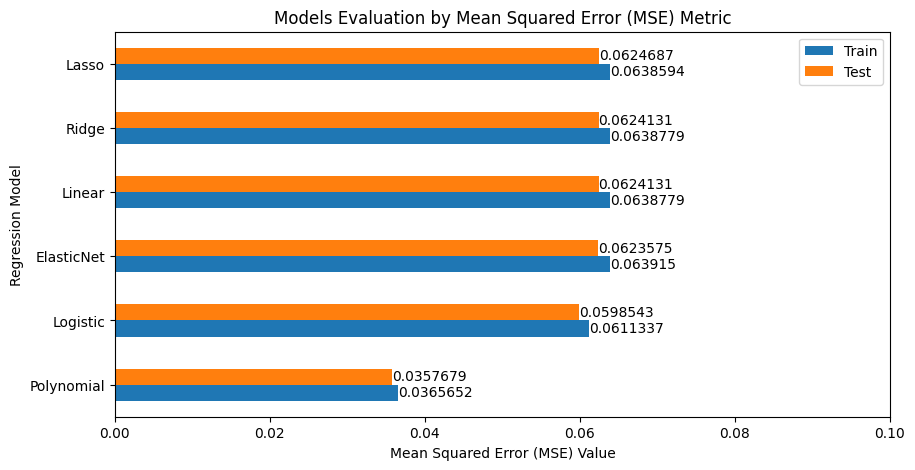

In [ ]:
model_scores_train_MSE = model_scores_train[model_scores_train["Metric"] == "Mean Squared Error"]
model_scores_test_MSE = model_scores_test[model_scores_test["Metric"] == "Mean Squared Error"]

model_scores_MSE = pd.DataFrame( { "Train" : model_scores_train_MSE["Value"].to_list(),
                    "Test" : model_scores_test_MSE["Value"].to_list() },
                  index = [name for name,_ in model_scores_train_MSE.index] )

model_scores_MSE = pd.DataFrame( model_scores_MSE, index=model_scores_MSE.mean(axis=1).sort_values(ascending=True).index )

ax = model_scores_MSE.plot.barh( figsize = (10, 5),
                  xlabel = "Mean Squared Error (MSE) Value",
                  ylabel = "Regression Model",
                  title = "Models Evaluation by Mean Squared Error (MSE) Metric",
                  xlim = (0.0, 0.1) )

for container in ax.containers:
    ax.bar_label(container)

plt.show()

As shown in the figure above, the polynomial regression model (with added polynomial features) has Mean Squared Error (MSE) values closer to 0 for both the training and test sets compared to the other regression models. This indicates that the polynomial regression model produces smaller prediction errors.

**Model Evaluation Based on the Mean Absolute Error (MAE) Metric**

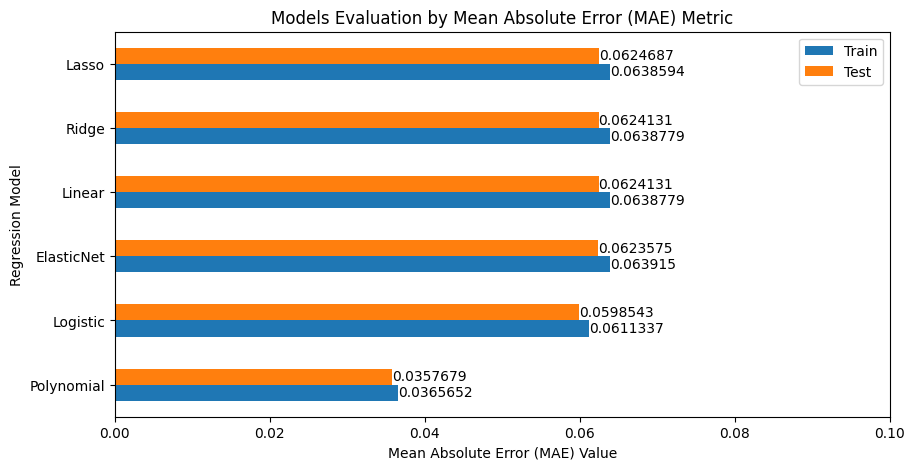

In [ ]:
model_scores_train_MAE = model_scores_train[model_scores_train["Metric"] == "Mean Absolute Error"]
model_scores_test_MAE = model_scores_test[model_scores_test["Metric"] == "Mean Absolute Error"]

model_scores_MAE = pd.DataFrame( { "Train" : model_scores_train_MAE["Value"].to_list(),
                    "Test" : model_scores_test_MAE["Value"].to_list() },
                  index = [name for name,_ in model_scores_train_MAE.index] )

model_scores_MAE = pd.DataFrame( model_scores_MAE, index=model_scores_MAE.mean(axis=1).sort_values(ascending=True).index )

ax = model_scores_MAE.plot.barh( figsize = (10, 5),
                  xlabel = "Mean Absolute Error (MAE) Value",
                  ylabel = "Regression Model",
                  title = "Models Evaluation by Mean Absolute Error (MAE) Metric",
                  xlim = (0.0, 0.1) )

for container in ax.containers:
    ax.bar_label(container)

plt.show()

As shown in the figure above, the polynomial regression model (with added polynomial features) has Mean Absolute Error (MAE) values ​​closer to 0 for both the training and test sets compared to the other regression models. This indicates that the polynomial regression model produces smaller prediction errors.

---

### **4.2 - Summary** <span id="4.2"></span>

Based on the analysis in the preceding sections, the most suitable model for our project is the polynomial regression model.

However, two important considerations arise:

1. If the data is relatively concentrated and the dataset is split using stratified sampling, the training and test sets may exhibit similar distributions. This can lead to overfitting in the polynomial model, especially if the test set lacks diversity.

2. Generally, logistic regression is better suited for binary classification tasks. As observed in the Models Evaluation section, logistic regression was the second most performant model.

<br/>

In the future, we should consider adding more data to enhance the generalization of the dataset, allowing for better validation of the regression model's results. Given that our project focuses on binary classification, comparing polynomial regression with categorical models could help identify a more effective approach for rainfall prediction.

---
---

# **5. REFERENCES** <span id="5"></span>

---
---


| Sources | Article | Author |
| :--- | :--- | :--- |
| Book | [Practitioner's Guide to Data Science](https://scientistcafe.com/ids/) | Hui Lin & Ming Li |
| Kaggle | [USA Rainfall Prediction Dataset (2024-2025)](https://www.kaggle.com/datasets/waqi786/usa-rainfall-prediction-dataset-2024-2025) | Waqar Ali |
| Kaggle | [PowerTransformers In-Depth Understanding(Box -Cox & Yeo Johnson)](https://www.kaggle.com/discussions/getting-started/330474) | Abhishek Kukreja |
| Medium | [How to Remove Outliers for Machine Learning?](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8) | Anuganti Suresh |
| Medium | [Categorical Data Encoding Techniques](https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f) | Krishnakanth Jarapala |
| Medium | [Correlation in machine learning -  All you need to know](https://medium.com/@abdallahashraf90x/all-you-need-to-know-about-correlation-for-machine-learning-e249fec292e9) | Abdallah Ashraf |
| Medium | [When to Use Mean, Median, and Mode for Imputing Missing Values](https://medium.com/@chandrikasai9997/imputing-missing-values-is-another-technique-used-to-handle-missing-data-in-a-dataset-824957ce71b4) | Chandrikasai |
| Medium | [Handling Missing Data with KNN Imputer](https://medium.com/@bhanupsingh484/handling-missing-data-with-knn-imputer-927d49b09015) | Bhanupsingh |
| Medium | [Multivariate Imputation by Chained-Equations (MICE)](https://medium.com/@kunalshrm175/multivariate-imputation-by-chained-equations-mice-2d3efb063434) | Kunal |
| Medium | [Hypothesis Testing with Python: T-Test, Z-Test, and P-Values](https://medium.com/@codewithpj/hypothesis-testing-with-python-t-test-z-test-and-p-values-code-examples-fa274dc58c36) | Praise James |
| Medium | [Five Methods for Data Splitting in Machine Learning](https://medium.com/@tubelwj/five-methods-for-data-splitting-in-machine-learning-27baa50908ed) | Gen. David |
| Medium | [Understanding Mean Absolute Error (MAE) in Regression: A Practical Guide](https://medium.com/@m.waqar.ahmed/understanding-mean-absolute-error-mae-in-regression-a-practical-guide-26e80ebb97df) | Waqar Ahmed |
| Scribbr | [Correlation Coefficient - Types, Formulas & Examples](https://www.scribbr.com/statistics/correlation-coefficient/) | Pritha Bhandari |
| TurinTech AI | [Data Quality in Machine Learning: How to Evaluate and Improve?](https://www.turintech.ai/data-quality-in-machine-learning-how-to-evaluate-and-improve/) | Chrystalla Pavlou |
| Tableau | [Guide To Data Cleaning: Definition, Benefits, Components, And How To Clean Your Data](https://www.tableau.com/learn/articles/what-is-data-cleaning#:~:text=tools%20and%20software-,What%20is%20data%20cleaning%3F,to%20be%20duplicated%20or%20mislabeled) | Tableau Team |
| GeeksforGeeks | [Univariate, Bivariate and Multivariate data and its analysis](https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/) | Aaradhana Thapliyal |
| Statology | [How to Perform t-Tests in Pandas](https://www.statology.org/pandas-t-test/) | Zach Bobbitt |
| Data36 | [Polynomial Regression in Python using scikit-learn](https://data36.com/polynomial-regression-python-scikit-learn/) | Tamas Ujhelyi |
| Investopedia | [R-Squared: Definition and How to Calculate](https://www.investopedia.com/terms/r/r-squared.asp) | Jason Fernando |
| Statistics By Jim | [Mean Squared Error (MSE)](https://statisticsbyjim.com/regression/mean-squared-error-mse/) | Jim Frost |
